# Lab | Random variable distributions
Refer to the files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv dataset.

## Instructions


Get the numerical variables from our dataset.


Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.


Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math
import warnings
from scipy import stats
from scipy.stats import skew
from scipy.stats import kurtosis
from sklearn import linear_model
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import cohen_kappa_score
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split #we need the train_test split 
from sklearn.preprocessing import OneHotEncoder

pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
cat = customer_df.select_dtypes('object')
num = customer_df.select_dtypes(np.number)

In [4]:
num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer Lifetime Value        9134 non-null   float64
 1   Income                         9134 non-null   int64  
 2   Monthly Premium Auto           9134 non-null   int64  
 3   Months Since Last Claim        9134 non-null   int64  
 4   Months Since Policy Inception  9134 non-null   int64  
 5   Number of Open Complaints      9134 non-null   int64  
 6   Number of Policies             9134 non-null   int64  
 7   Total Claim Amount             9134 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 571.0 KB


In [5]:
cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Customer           9134 non-null   object
 1   State              9134 non-null   object
 2   Response           9134 non-null   object
 3   Coverage           9134 non-null   object
 4   Education          9134 non-null   object
 5   Effective To Date  9134 non-null   object
 6   EmploymentStatus   9134 non-null   object
 7   Gender             9134 non-null   object
 8   Location Code      9134 non-null   object
 9   Marital Status     9134 non-null   object
 10  Policy Type        9134 non-null   object
 11  Policy             9134 non-null   object
 12  Renew Offer Type   9134 non-null   object
 13  Sales Channel      9134 non-null   object
 14  Vehicle Class      9134 non-null   object
 15  Vehicle Size       9134 non-null   object
dtypes: object(16)
memory usage: 1.1+ MB


In [6]:
def distplot_df(df):
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    cols=list(df.columns)
    
    for col in cols:
        sns.distplot(df[col])
        plt.show()

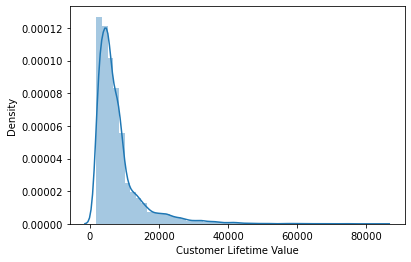

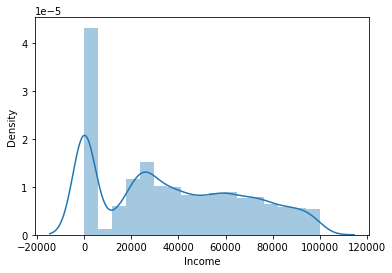

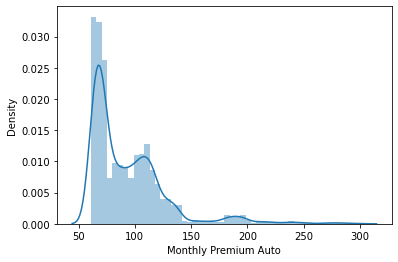

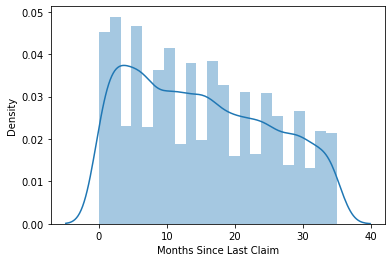

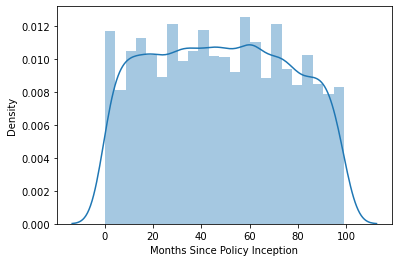

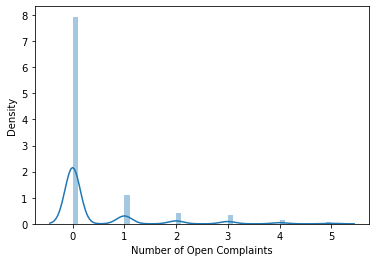

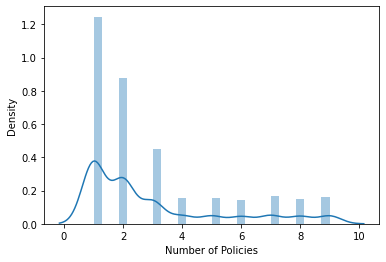

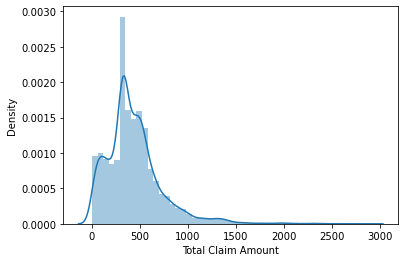

In [7]:
distplot_df(num)

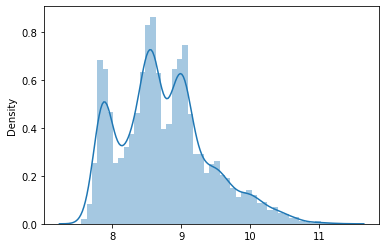

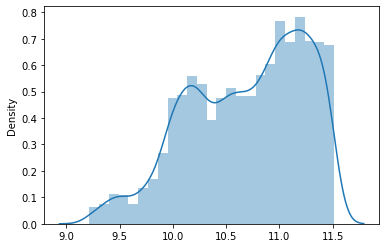

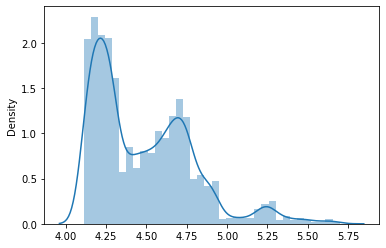

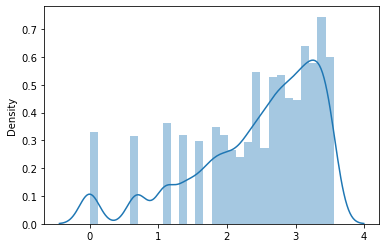

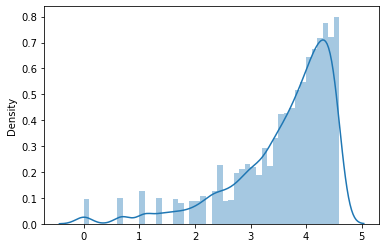

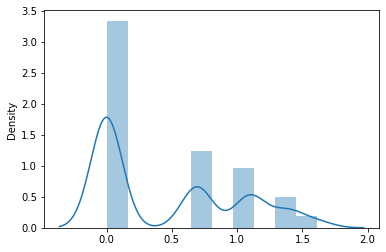

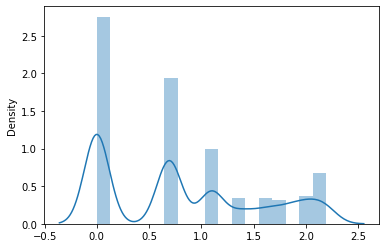

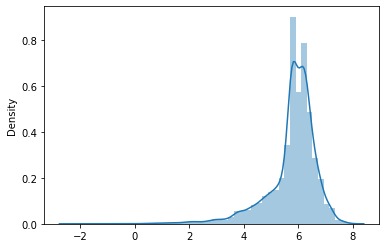

In [10]:
def log_transfom_clean1(x):
    if np.isfinite(x) and x!=0: # If the value is finite and != 0...
        return np.log(x)
    else:
        return np.NAN # We are returning NaNs so that we can replace them later
for i in num:
    data_log = list(map(log_transfom_clean1, num[i]))
    sns.distplot(data_log)
    plt.show()